# Student Performance EDA 
The goal of this script is to perform some EDA on the chosen dataset, available at https://www.kaggle.com/datasets/barkhaverma/student-performance. It has information about student achievement in secondary education of two Portuguese schools, and includes student grades, demographic, social and school related features.
We will look for a better understanding of the data we are dealing with, identifying potential problems, and creating more significant features from the raw data.


## Overview 
### 1) Understand the shape of the data (Histograms, box plots, etc.)

### 2) Data Cleaning 

### 3) Data Exploration

### 4) Feature Engineering 


In [68]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder 

First we must load the data we will be using. We modifiy some of the features in the data, to make it more suitable for our project purpouses.

In [69]:
data = pd.read_csv('../Data/student-mat.csv', sep = ';')
Fjob_tmp = data.Fjob
schoolsup_tmp = data.schoolsup


**From the begining, we will remove G1 and G2. This is because for the motivation of this project, we want to be able to predict student achievements before the course starts, and therefore we will realistically not have this info available at the time of new predictions.
Also, if we plot the correlation matrix with G3, this is very high, so the problem becomes trivial to solve:**

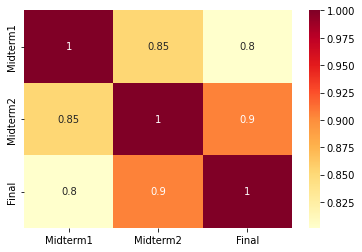

In [70]:
midterm1 = data.pop('G1')
midterm2 = data.pop('G2')
Grades = pd.DataFrame({'Midterm1' : midterm1, 'Midterm2': midterm2, 'Final': data.G3})

corr = Grades.corr()
# corr.style.background_gradient(cmap='coolwarm')
sns.heatmap(corr, annot=True, cmap = 'YlOrRd' )
plt.show()

**Also, we are going to perform classification, so we will modify our target variable for this.**

    - Low level (0-69%)      [0  , 13]
    - Medium level (70-89%)  [14 , 17]
    - High level (90-100%)   [18 , 20]

In [71]:
g3_dict = {0: 'L', 1: 'L', 2: 'L', 3: 'L', 4: 'L', 5: 'L', 6: 'L', 7: 'L', 8: 'L', 9: 'L', 10: 'L', 11: 'L', 12: 'L', 13: 'L',
          14: 'M', 15: 'M', 16: 'M', 17: 'M',
          18: 'H', 19: 'H', 20: 'H'}


data.G3 = [g3_dict[i] for i in data.G3]
data['G3'] = pd.Categorical(data['G3'], ordered=True, categories=['H','M','L'])
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,6,L
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,4,L
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,10,L
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,2,M
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,4,L


## Project Planning
We outline the main steps to take in our analysis

In [72]:
# Understand nature of the data .info() .describe()
# Histograms and boxplots 
# Value counts 
# Missing data 
# Correlation between the metrics 
# Explore interesting themes 
    # Does moer studytime relate to higher achievements? 
    # Does the school make any difference in student performance?
    # Do students recieving support of any type perform better?
    # Does alcohol consumption affect performance?
    # Do students that go out more often have lower grades?
# Feature engineering 
    # Average alcohol consumption across the week
    # Merge types of support into 1 variable
    # Create a measure of how much students scocialize
    # Ratio of studytime to freetime
    # Identifying repeaters

## Light Data Exploration 

In [73]:
#quick look at our data types & null counts 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 31 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   school      395 non-null    object  
 1   sex         395 non-null    object  
 2   age         395 non-null    int64   
 3   address     395 non-null    object  
 4   famsize     395 non-null    object  
 5   Pstatus     395 non-null    object  
 6   Medu        395 non-null    int64   
 7   Fedu        395 non-null    int64   
 8   Mjob        395 non-null    object  
 9   Fjob        395 non-null    object  
 10  reason      395 non-null    object  
 11  guardian    395 non-null    object  
 12  traveltime  395 non-null    int64   
 13  studytime   395 non-null    int64   
 14  failures    395 non-null    int64   
 15  schoolsup   395 non-null    object  
 16  famsup      395 non-null    object  
 17  paid        395 non-null    object  
 18  activities  395 non-null    object  
 19  nursery 

We see there are no missing values, so no data inputation will be needed. Also, some of the binned classes are incorrectly classified as being numeric, we will fix this.

In [74]:
#quick way to separate numeric columns
numeric = list(data.describe().columns)

# The binned values are considered numeric which is an error, we will do it manually
numeric = ['age','absences']
print(numeric)

['age', 'absences']


In [75]:
#retrieve categorical columns
tot_cols = list(data.columns)
categorical = [i for i in tot_cols if i not in numeric]
print(categorical)

['school', 'sex', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'G3']


In [76]:
# look at numeric and categorical values separately 
data_num = data[numeric]
data_cat = data[categorical].astype("category")

data = pd.concat([data_cat, data_num], axis = 1)

In [77]:
# Use the .describe() method to understand the central tendencies of the numeric data 
data.describe()

,age,absences
count,395.000000,395.000000
mean,16.696203,5.708861
std,1.276043,8.003096
min,15.000000,0.000000
25%,16.000000,0.000000
50%,17.000000,4.000000
75%,18.000000,8.000000
max,22.000000,75.000000


### 1) For numeric data 
* Made histograms to understand distributions 
* Corrplot 
* Pivot table comparing G3 across numeric variables 

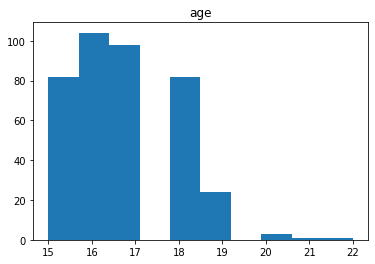

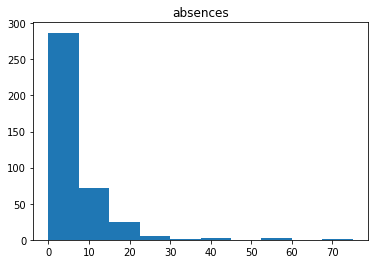

In [78]:
#distributions for all numeric variables 
for i in data_num.columns:
    plt.hist(data_num[i])
    plt.title(i)
    plt.show()

Perhaps we should take the non-normal distributions and consider normalizing them?

In [79]:
corr = data_num.corr()
print(corr)
corr.style.background_gradient(cmap='YlOrRd')

              age  absences
age       1.00000   0.17523
absences  0.17523   1.00000


,age,absences
age,1.000000,0.175230
absences,0.175230,1.000000


* **It looks like age and absences are positively related. That is, older students are more likely to miss more classes. Could this be because they are repeaters?**

In [80]:
# compare G3 across age and absences 
pd.pivot_table(data, index = 'G3', values = ['age','absences'], aggfunc = {'age': 'mean', 'absences' : 'median'},sort = True)

,absences,age
G3,,
H,4,16.333333
M,2,16.378049
L,4,16.806780


* **Looks like there is an age difference between the groups, where L students are older**

* **Interestingly, those with less absences are the middle achieving ones** 

* **From the histograms we see there are outliers in absences, so we derive the median rather than the mean for better interpretability**

### 2) For Categorical Data 
* Made bar charts to understand balance of classes 
* Made pivot tables to understand relationship with survival

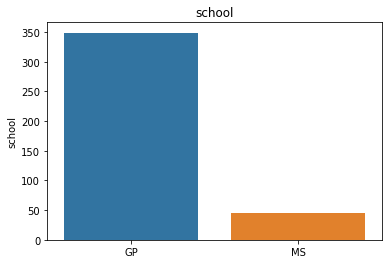

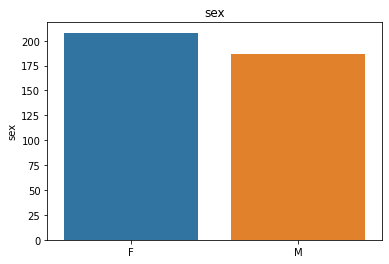

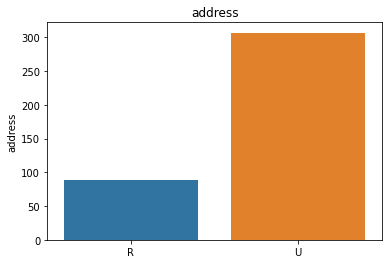

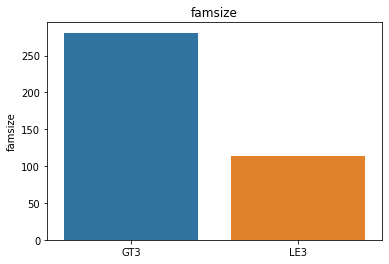

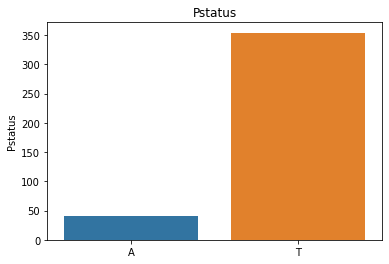

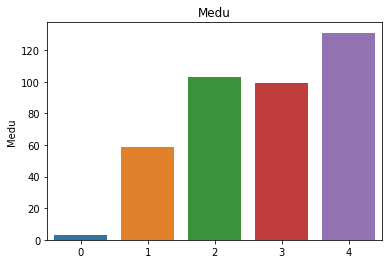

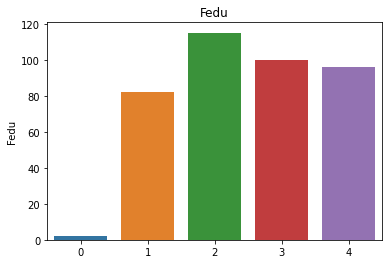

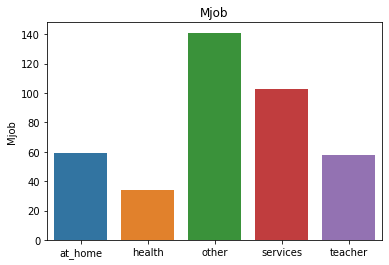

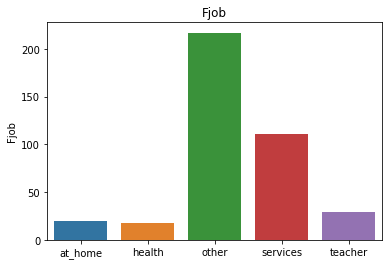

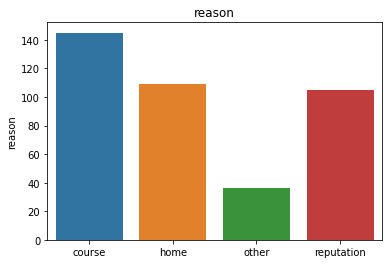

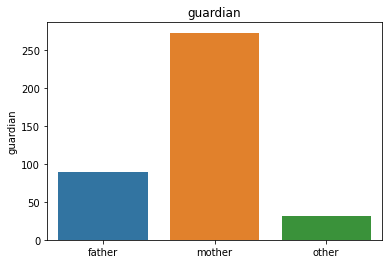

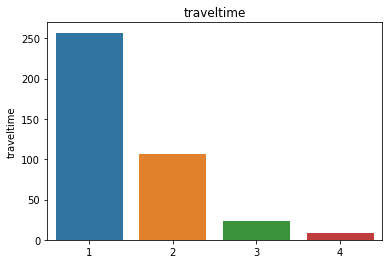

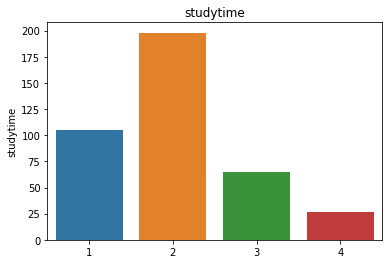

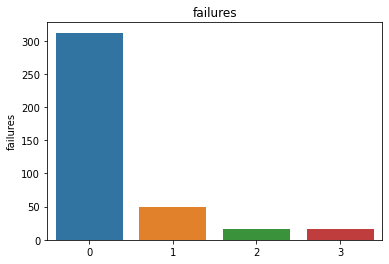

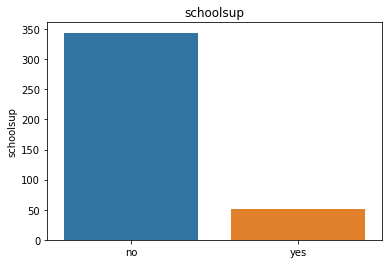

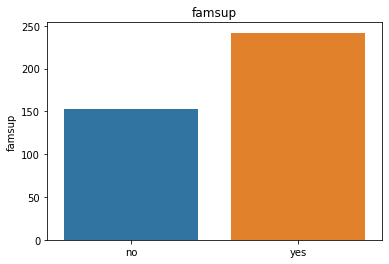

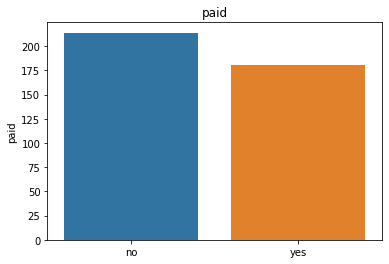

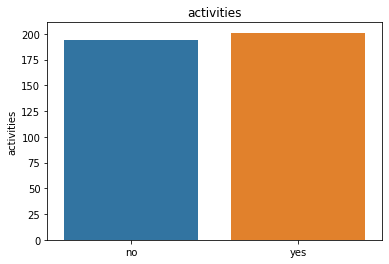

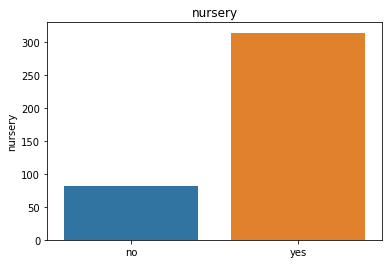

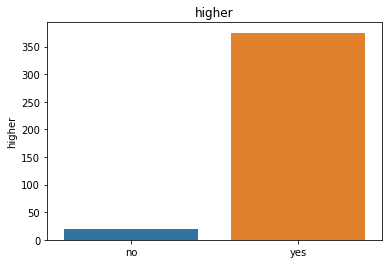

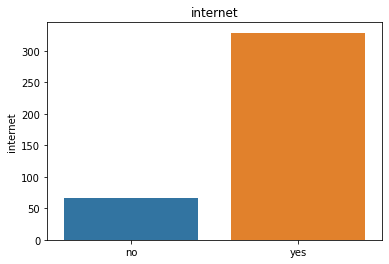

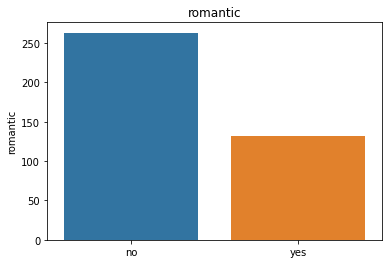

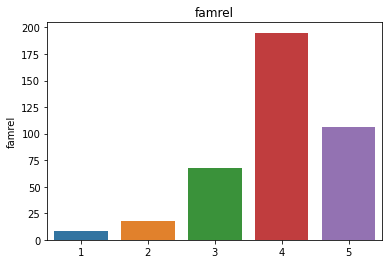

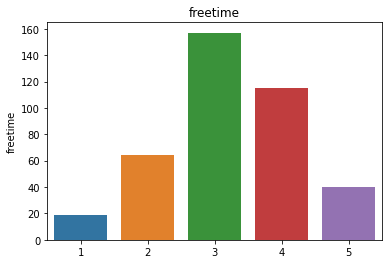

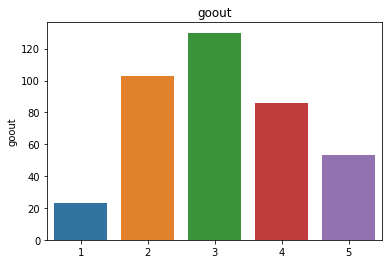

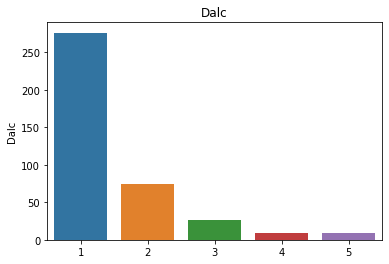

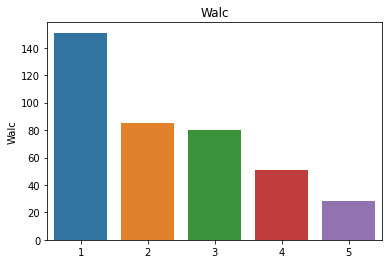

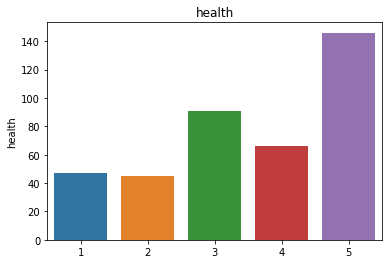

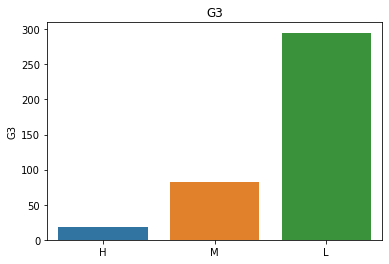

In [81]:
for i in data_cat.columns:
    sns.barplot(x = data_cat[i].value_counts().index, y = data_cat[i].value_counts()).set_title(i)
    plt.show()    

A lot of classes have great unbalances between classes. We may want to explore it later on (feature eng?)

In [82]:
# Comparing G3 and each of these categorical variables 
for i in data_cat.columns:
    print(pd.crosstab(data.G3, data[i], values = 'age' ,aggfunc ='count', normalize='columns').applymap(lambda x: "{0:.0f}%".format(100*x)))
    print()

school   GP   MS
G3              
H        5%   2%
M       22%  13%
L       73%  85%

sex    F    M
G3           
H     3%   6%
M    19%  23%
L    78%  71%

address    R    U
G3               
H         3%   5%
M        11%  23%
L        85%  72%

famsize  GT3  LE3
G3               
H         4%   5%
M        21%  20%
L        75%  75%

Pstatus    A    T
G3               
H        10%   4%
M        15%  21%
L        76%  75%

Medu    0    1    2    3    4
G3                           
H      0%   0%   2%   6%   8%
M     67%   7%  16%  17%  33%
L     33%  93%  83%  77%  60%

Fedu    0    1    2    3    4
G3                           
H      0%   2%   4%   5%   6%
M     50%  12%  21%  18%  30%
L     50%  85%  75%  77%  64%

Mjob at_home health other services teacher
G3                                        
H         2%     6%    1%       9%      7%
M        14%    38%   18%      21%     24%
L        85%    56%   81%      70%     69%

Fjob at_home health other services teacher
G3       

* **failures, schoolsup, higher, famrel, Medu, Fjob (teacher), traveltime, Dalc, failures**

* **famsize, famsup, paid, activities, nursery is very equal distrib, we can ignore**

* **guardian into parent / other**

## Feature Engineering 
### 1) Alcohol - We can merge Walc and Dalc by computing their average


We can see higher alcohol consumptions lead to worse performance

In [83]:
########## Average Alcohol ###########
Walc = data.pop('Walc').astype(int)
Dalc = data.pop('Dalc').astype(int)

Avg_alcohol = pd.DataFrame({'Alcohol': (Walc + Dalc) / 2})
data = pd.concat( [data, Avg_alcohol], axis = 1)

In [84]:
print(pd.crosstab(data.G3, data.Alcohol, values = 'age' ,aggfunc ='count', normalize='columns').applymap(lambda x: "{0:.0f}%".format(100*x)))

Alcohol  1.0  1.5  2.0  2.5  3.0  3.5  4.0   4.5   5.0
G3                                                    
H         8%   3%   3%   2%   0%   6%   0%    0%    0%
M        25%  26%  25%  13%   9%  12%  22%    0%    0%
L        67%  71%  72%  84%  91%  82%  78%  100%  100%


### 2) Support - Merge the support types into a single feature (None, fam, school, paid, Combined)

School support negatively affects students. The other types of support have no significant differences. It may be more informative to merge into school support vs other types of support

### 2.1] Merge into 1 feature

In [85]:
######## Merge Support types --> # Support ###########
# For None -> 0 ; # For family -> 1 ; # For school -> 2 ; # For paid -> 3 ; # For +1 type of support ->4
le = LabelEncoder()

support = []
schoolsup = le.fit_transform(data.pop('schoolsup'))
famsup = le.fit_transform(data.pop('famsup'))
paid = le.fit_transform(data.pop('paid'))

for i in range(len(data)):
    num_support = schoolsup[i] + famsup[i] + paid[i]
    if num_support > 1:
        support.append('4')  
    elif num_support == 0:
        support.append('0')   
    else:
        if schoolsup[i] == 1:
            support.append('2')    
        elif famsup[i] == 1:
            support.append('1')   
        else:
            support.append('3') 
            
support = pd.DataFrame({'Support': support}).astype('category')
data = pd.concat([data, support], axis = 1)

In [86]:
print(pd.crosstab(data.G3, data.Support, values = 'age' ,aggfunc ='count', normalize='columns').applymap(lambda x: "{0:.0f}%".format(100*x)))

Support    0    1    2    3    4
G3                              
H         6%   5%   0%   5%   4%
M        22%  25%  10%  23%  18%
L        72%  70%  90%  72%  78%


### 2.2] Merge into school vs other type

In [ ]:
######## Merge Support types --> school vs non-school Support ###########
# For no school support -> 0 ; # For school support -> 1 
data.pop('Support')
le = LabelEncoder()

support = []
for i in range(len(data)):
    if schoolsup[i] == 1:
        support.append(1)
    else:
        support.append(0) 
            
support = pd.DataFrame({'Support': support}).astype('category')
data = pd.concat([data, support], axis = 1)

In [ ]:
print(pd.crosstab(data.G3, data.Support, values = 'age' ,aggfunc ='count', normalize='columns').applymap(lambda x: "{0:.0f}%".format(100*x)))

### 3) Social Life - Can be computed through the ratio of goout/freetime


In [ ]:
########## Socializing Ratio ###########
# goout/freetime
goout = data.pop('goout').astype(int)
freetime = data.pop('freetime').astype(int)
social = []
for i in range(len(freetime)):
    if freetime[i] == 0:
        social.append(0)
    else:
        social.append(goout[i]/freetime[i])
        
social = pd.DataFrame({'Social': social})
data = pd.concat([data, social], axis = 1)

In [ ]:
pd.pivot_table(data, index = 'G3', values = ['Social'])

No significant difference


### 4) Study - Ratio of studytime/freetime


In [ ]:
########## Studying Ratio ###########
# studytime/freetime
studytime = data.pop('studytime').astype(int)
study = []
for i in range(len(studytime)):
    if freetime[i] == 0:
        study.append(0)
    else:
        study.append(studytime[i]/freetime[i])
        
study = pd.DataFrame({'Study': study})
data = pd.concat([data, study], axis = 1)

In [ ]:
pd.pivot_table(data, index = 'G3', values = ['Study'])

On average, higher achieving students spend more of their time studying

Relevant because by only looking at studytime, it seems like many of the students are investing very little time. Reality is that out of their free time, they invert more in studying. Ej: social ratio also very high

### 5) Repeaters - Those older than 16 with 1 or more failures

In [ ]:
########## Repeaters ###########
# if age > 16 and failures > 0
age = data.pop('age')
failures = data.pop('failures').astype(int)

Repeater = []
for i in range(len(failures)):
    if age[i] > 16 and failures[i] > 0:
        Repeater.append(1)
    else:
        Repeater.append(0)
        
rep = pd.DataFrame({'Repeater': Repeater}).astype('category')
data = pd.concat([data, rep], axis = 1)

In [ ]:
print(pd.crosstab(data.G3, data.Repeater, values = 'age' ,aggfunc ='count', normalize='columns').applymap(lambda x: "{0:.0f}%".format(100*x)))

### 6) Guardian - Into parent or other (no difference between mother and father)

In [ ]:
guardian = data.pop('guardian')
Guardian = [i if i == 'other' else 'parent' for i in guardian]
guard = pd.DataFrame({'Guardian': Guardian}).astype('category')
data = pd.concat([data, guard], axis = 1)

In [ ]:
print(pd.crosstab(data.G3, data.Guardian, values = 'age' ,aggfunc ='count', normalize='columns').applymap(lambda x: "{0:.0f}%".format(100*x)))

### 7) Fteacher - It looks like if father is a teacher, student achieves better

In [115]:
data.Fjob = data.Fjob.astype('object')

<AxesSubplot:xlabel='G3', ylabel='Father Job'>

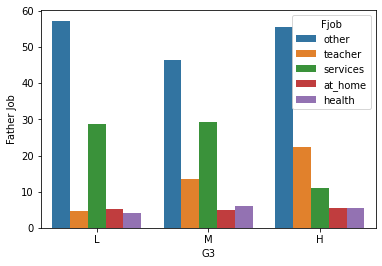

In [116]:
x = 'G3'
y = 'Fjob'
(data.groupby(x)[y].value_counts(normalize=True).mul(100).rename('Father Job',).reset_index()
 .pipe((sns.barplot,'data'), x=x,y='Father Job',hue=y, order = ['L', 'M', 'H']))

In [ ]:
fjob = data.pop('Fjob')
Fjob = [i if i == 'teacher' else 'other' for i in fjob]
job = pd.DataFrame({'Fjob': Fjob}).astype('category')
data = pd.concat([data, job], axis = 1)

In [ ]:
print(pd.crosstab(data.G3, data.Fjob, values = 'age' ,aggfunc ='count', normalize='columns').applymap(lambda x: "{0:.0f}%".format(100*x)))

# Analyzing New Data

We also take note of some of the comments from the previous exploration:
* famsize, famsup, paid, activities, nursery is very equal distrib, we can ignore

Therefore, we will delete these variables from the new dataset (they don´t bring new info)

In [ ]:
data.pop('famsize') ; data.pop('activities') ; data.pop('nursery')

G3 = data.pop('G3')
data = pd.concat([G3, data], axis = 1)

#quick way to separate numeric columns
numeric = list(data.describe().columns)
print('Numeric: ', numeric)

tot_cols = list(data.columns)
categorical = [i for i in tot_cols if i not in numeric]
print('Categorical: ',categorical)

data_num = data[numeric]
data_cat = data[categorical].astype("category")

## *Numeric Data*

In [ ]:
#distributions for all numeric variables 
for i in data_num.columns:
    plt.hist(data_num[i])
    plt.title(i)
    plt.show()

Could use some feature normalization on some of the attributes

In [ ]:
corr = data_num.corr()
corr.style.background_gradient(cmap='YlOrRd')

**Positive correlations**
* Alcohol and absences
* Social and Alcohol
* Study and Social

**Negative correlations**
* Alcohol and Study

In [ ]:
# compare G3 across absences, Alcohol,Social and Study
pd.pivot_table(data, index = 'G3', values = ['absences', 'Alcohol','Social','Study'], sort = True)

* Lower achieving students have higher alcohol consumption
* High achieving students have higher Study scores

## *Categorical Data*

In [ ]:
# Comparing G3 and each of these categorical variables 
for i in data_cat.columns:
    if i != 'G3':
        print(pd.crosstab(data.G3, data[i], values = 'age' ,aggfunc ='count', normalize='columns').applymap(lambda x: "{0:.0f}%".format(100*x)))
        print()

Now categorical features look more relevant. We are ready to start modelling.


**For scikit, numeric data is preferred, so we will change the dtype of our variables**

In [ ]:
#We first separate those columns which are binned, and convert them to numeric
data_cat_num = ['Medu', 'Fedu','traveltime', 'famrel', 'health', 'Support', 'Repeater']
for i in (data_cat_num):
    data[i] = data[i].astype('int')

data_cad_codes = [i for i in data_cat.columns if i not in data_cat_num]
for i in data_cad_codes:
    data[i] = data[i].cat.codes
    
# data.info()    
data.to_csv('modelling_KJ_EDA.csv')